In [38]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array,image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image
print(Image.__file__)
from sklearn.preprocessing import LabelEncoder
import cv2
import numpy as np
from IPython.display import Image, display
from keras.models import load_model
from scipy.misc import imread,imresize

C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\PIL\Image.py


In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

model.add(Conv2D(32, (3, 3), data_format="channels_last"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(75))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(75))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])




In [40]:
batch_size = 50

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'fruit/Training',  # this is the target directory
        target_size=(100, 100),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'fruit/Test',
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical')

Found 37836 images belonging to 75 classes.
Found 12709 images belonging to 75 classes.


In [41]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save('first_try.h5')


Epoch 1/50
40/40 [==============================] - 55s 1s/step - loss: 0.2927 - acc: 0.8779 - val_loss: 0.0891 - val_acc: 0.9867
Epoch 2/50
40/40 [==============================] - 42s 1s/step - loss: 0.1233 - acc: 0.9719 - val_loss: 0.0733 - val_acc: 0.9867
Epoch 3/50
40/40 [==============================] - 57s 1s/step - loss: 0.0960 - acc: 0.9837 - val_loss: 0.0847 - val_acc: 0.9867
Epoch 4/50
40/40 [==============================] - 40s 1s/step - loss: 0.0848 - acc: 0.9858 - val_loss: 0.0624 - val_acc: 0.9868
Epoch 5/50
40/40 [==============================] - 48s 1s/step - loss: 0.0787 - acc: 0.9863 - val_loss: 0.0675 - val_acc: 0.9868
Epoch 6/50
40/40 [==============================] - 54s 1s/step - loss: 0.0738 - acc: 0.9863 - val_loss: 0.0538 - val_acc: 0.9868
Epoch 7/50
40/40 [==============================] - 37s 927ms/step - loss: 0.0688 - acc: 0.9865 - val_loss: 0.0549 - val_acc: 0.9871
Epoch 8/50
40/40 [==============================] - 44s 1s/step - loss: 0.0644 - acc: 0

In [42]:
classes = train_generator.class_indices
print(classes)

{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Apricot': 10, 'Avocado': 11, 'Avocado ripe': 12, 'Banana': 13, 'Banana Red': 14, 'Cactus fruit': 15, 'Cantaloupe 1': 16, 'Cantaloupe 2': 17, 'Carambula': 18, 'Cherry 1': 19, 'Cherry 2': 20, 'Cherry Rainier': 21, 'Cherry Wax Black': 22, 'Cherry Wax Red': 23, 'Cherry Wax Yellow': 24, 'Clementine': 25, 'Cocos': 26, 'Dates': 27, 'Granadilla': 28, 'Grape Pink': 29, 'Grape White': 30, 'Grape White 2': 31, 'Grapefruit Pink': 32, 'Grapefruit White': 33, 'Guava': 34, 'Huckleberry': 35, 'Kaki': 36, 'Kiwi': 37, 'Kumquats': 38, 'Lemon': 39, 'Lemon Meyer': 40, 'Limes': 41, 'Lychee': 42, 'Mandarine': 43, 'Mango': 44, 'Maracuja': 45, 'Melon Piel de Sapo': 46, 'Mulberry': 47, 'Nectarine': 48, 'Orange': 49, 'Papaya': 50, 'Passion Fruit': 51, 'Peach': 52, 'Peach Flat': 53, 'Pear': 54, 'Pear Ab

[5]


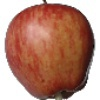

In [43]:
model = load_model('first_try.h5')
x = image.load_img('fruit/Training/Apple Red 1/1_100.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)


print(classes)
display(Image('fruit/Training/Apple Red 1/1_100.jpg'))

[1]


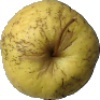

In [45]:
model = load_model('first_try.h5')
x = image.load_img('test-multiple_fruits/r_139_100.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)


print(classes)
display(Image('test-multiple_fruits/r_139_100.jpg'))

[16]


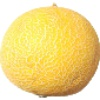

In [46]:
model = load_model('first_try.h5')
x = image.load_img('fruit/Training/Cantaloupe 1/1_100.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)

print(classes)
display(Image('fruit/Training/Cantaloupe 1/1_100.jpg'))

[18]


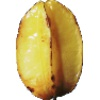

In [47]:
model = load_model('first_try.h5')
x = image.load_img('fruit/Training/Carambula/1_100.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)


print(classes)
display(Image('fruit/Training/Carambula/1_100.jpg'))

[48]


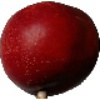

In [48]:
model = load_model('first_try.h5')
x = image.load_img('fruit/Training/Nectarine/2_100.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)


print(classes)
display(Image('fruit/Training/Nectarine/2_100.jpg'))

[50]


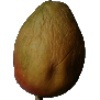

In [49]:
model = load_model('first_try.h5')
x = image.load_img('fruit/Training/Papaya/1_100.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)


print(classes)
display(Image('fruit/Training/Papaya/1_100.jpg'))

[15]


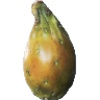

In [50]:
model = load_model('first_try.h5')
x = image.load_img('fruit/Training/Cactus fruit/1_100.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)


print(classes)
display(Image('fruit/Training/Cactus fruit/1_100.jpg'))

[54]


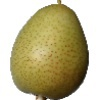

In [51]:
model = load_model('first_try.h5')
x = image.load_img('fruit/Training/Pear/1_100.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)


print(classes)
display(Image('fruit/Training/Pear/1_100.jpg'))

[66]


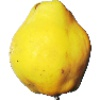

In [52]:
model = load_model('first_try.h5')
x = image.load_img('fruit/Training/Quince/1_100.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)


print(classes)
display(Image('fruit/Training/Quince/1_100.jpg'))

[20]


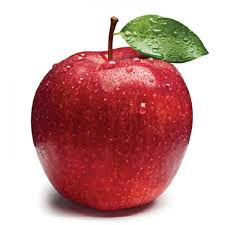

In [53]:
model = load_model('first_try.h5')
x = image.load_img('test-multiple_fruits/download.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)

print(classes)
display(Image('test-multiple_fruits/download.jpg'))

71


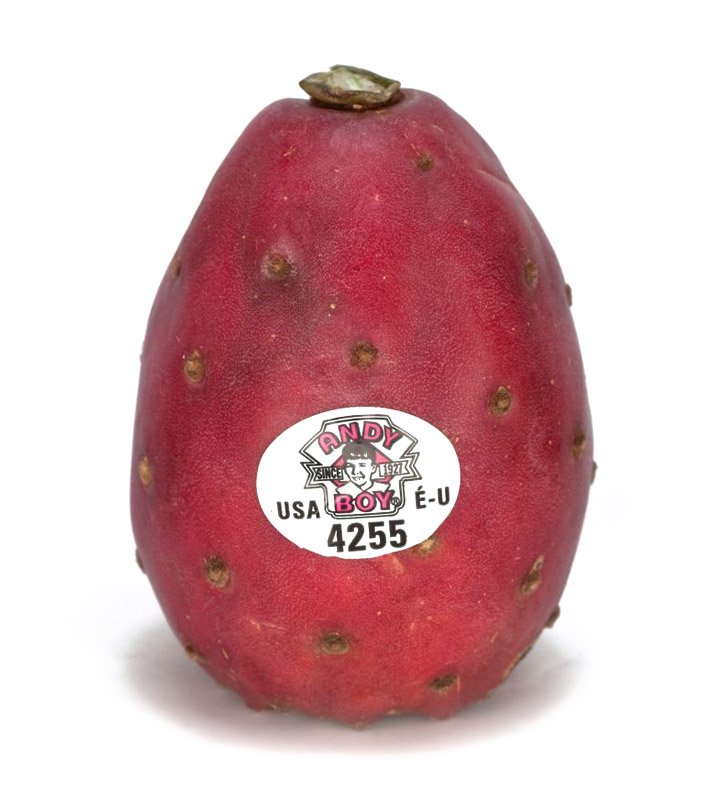

In [55]:
model = load_model('first_try.h5')

x = image.load_img('test-multiple_fruits/cp-red-ftr.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)

print(classes[0])
display(Image('test-multiple_fruits/cp-red-ftr.jpg'))

[13]


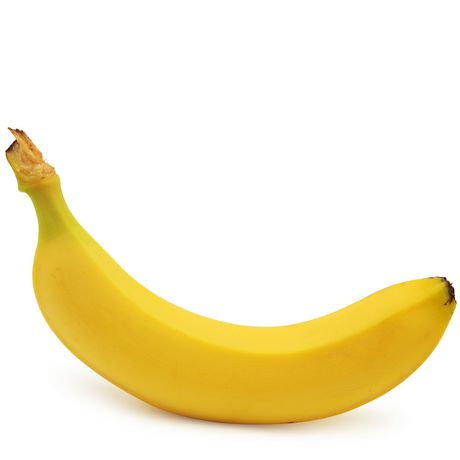

In [56]:
model = load_model('first_try.h5')

x = image.load_img('test-multiple_fruits/875806_R.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)

print(classes)
display(Image('test-multiple_fruits/875806_R.jpg'))

[45]


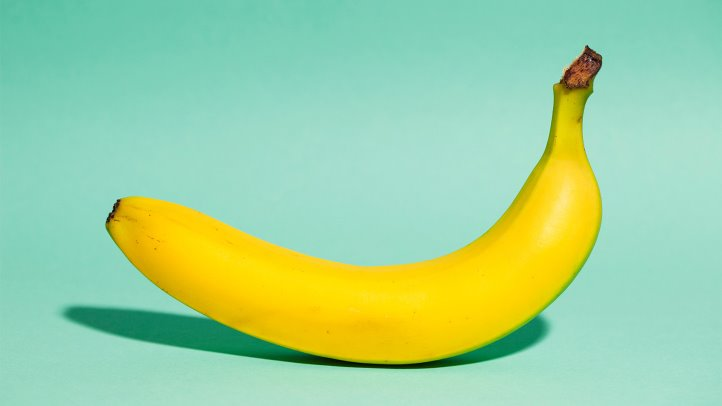

In [58]:
model = load_model('first_try.h5')

x = image.load_img('test-multiple_fruits/How-Many-Calories-Are-in-a-Banana-1440x810.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)

print(classes)
display(Image('test-multiple_fruits/How-Many-Calories-Are-in-a-Banana-1440x810.jpg'))

[60]


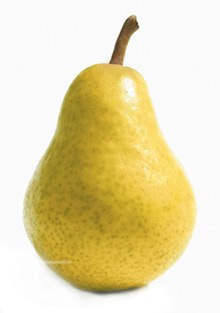

In [59]:
model = load_model('first_try.h5')

x = image.load_img('test-multiple_fruits/pear.bartlett.jpg', target_size=(100,100))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

classes = model.predict_classes(x)


print(classes)
display(Image('test-multiple_fruits/pear.bartlett.jpg'))